---
## **Stock Price Prediction using Multiple Linear Regression**
## **-by Harrish Ragavendar S**
---

### **Importing the modules**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### **Reading the dataset**

In [59]:
df = pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [60]:
df['Date'] = pd.to_datetime(df.Date)

In [61]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [62]:
df.shape

(1692, 7)

### **Dropping the irrelevant data**

In [63]:
df.drop('Adj Close',axis=1,inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


### **Checking for missing values**

In [64]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### **Analysing the dataset**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [66]:
df.describe()

,Open,High,Low,Close,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07


### **Plot of Opening price over the days**

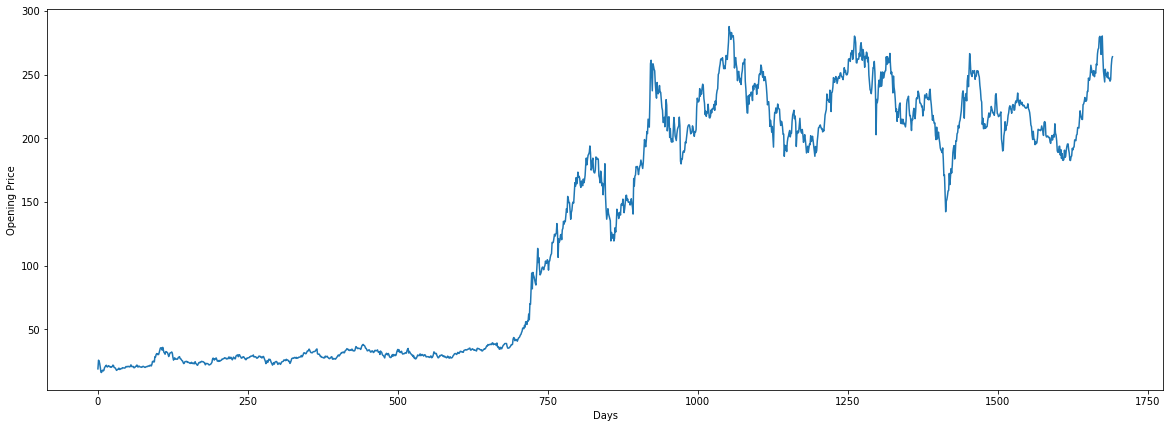

In [67]:
df['Open'].plot(figsize=(20,7),xlabel="Days",ylabel="Opening Price")

### **Plot of Closing price over the days**

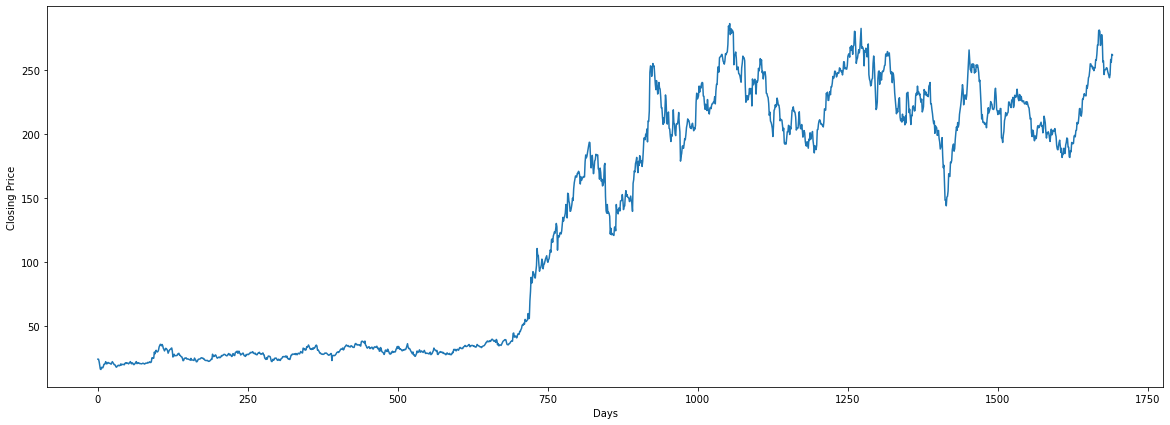

In [68]:
df['Close'].plot(figsize=(20,7),xlabel="Days",ylabel="Closing Price")

### **Scatter plot of Opening price over the days**

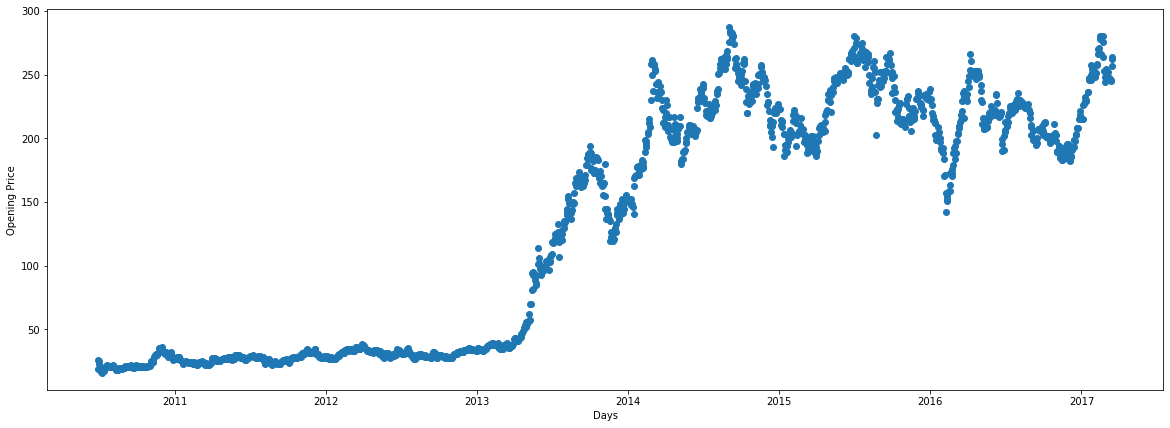

In [69]:
plt.figure(figsize=(20,7))
plt.xlabel("Days")
plt.ylabel("Opening Price")
plt.scatter(df.Date,df.Open)

### **Scatter plot of Closing price over the days**

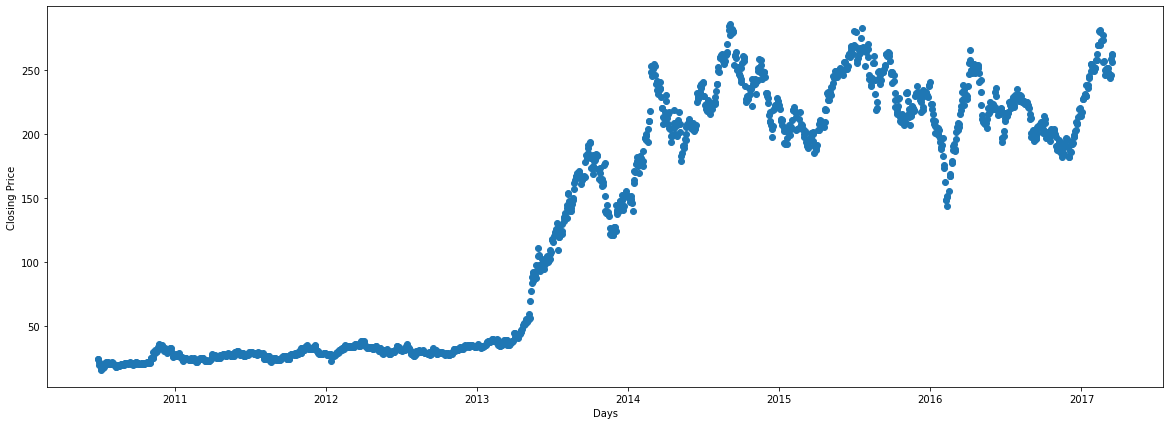

In [70]:
plt.figure(figsize=(20,7))
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.scatter(df.Date,df.Close)

### **Splitting the data as test and train datasets**

In [71]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
X_train.shape

(1269, 4)

In [74]:
X_test.shape

(423, 4)

### **Fitting the train dataset into Linear Regression Model**

In [75]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### We have four independent variables and one dependent variable. Hence our Multiple Linear Regression formula will be 

## y = b4*x4 + b3*x3 + b2*x2 + b1*x1 + b0 , where 

### y -> Output to be predicted (Dependant variable)
### x1,x2,x3,x4 -> Independent input variables
### b1,b2,b3,b4 -> Coefficients
### b0 -> Intercept

In [76]:
lr.coef_

array([-5.61128249e-01,  8.20244083e-01,  7.40523854e-01, -2.44481307e-08])

In [77]:
lr.intercept_

0.03439958011327349

### **Predicting the Closing Stock Prices for our test dataset**

In [78]:
predicted = lr.predict(X_test)

### **Evaluating the accuracy of our prediction**

In [79]:
eval_frame = pd.DataFrame({'Predicted price':predicted,'Actual Price':y_test})
eval_frame

,Predicted price,Actual Price
124,31.253574,30.090000
1688,255.654999,258.000000
1397,202.532384,204.990005
6,16.689894,17.459999
1279,265.429280,263.820007
...,...,...
1222,233.685818,236.800003
215,26.628928,26.440001
536,30.576112,31.170000
1630,201.294051,202.490005


In [80]:
lr.score(X_test,y_test)

0.999703484441961

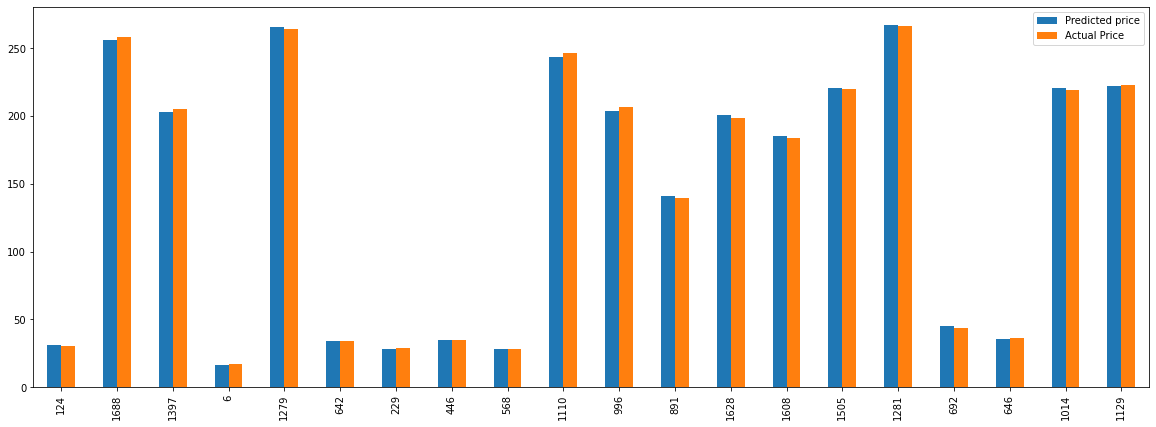

In [81]:
eval_frame.head(20).plot(kind='bar',figsize=(20,7))

## **Conclusion**

### **Hence our Linear Regression Model has an efficiency or accuracy of 99.97 %.**
---